Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* Use the Matplotlib and Seaborn libraries.
* Include a written description of three observable trends based on the data. 
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  

In [1]:
# Dependencies
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import tweepy
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json


# Import and Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = os.environ['Twitt_Consumer_Key']
consumer_secret = os.environ['Twitt_Consumer_Secret']
access_token = os.environ['Twitt_Access_Token']
access_token_secret = os.environ['Twitt_Access_Secret']

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
news_sources = ("@BBCWorld", "@CNN", "@FoxNews",
                "@CBS", "@nytimes", "@AJEnews")

In [3]:
date_list = []
text_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
source_list = []
position_list = []


In [4]:
for source in news_sources:
    
    tweets = api.user_timeline(source, count = 100)
    counter = 0
    
    for tweet in tweets:
           
        analyzed_result = analyzer.polarity_scores(tweet['text'])
        
        compound_list.append(analyzed_result["compound"])
        positive_list.append(analyzed_result["pos"])
        negative_list.append(analyzed_result["neg"])
        neutral_list.append(analyzed_result["neu"])        
        source_list.append(tweet['user']['name'])
        text_list.append(tweet['text'])
        date_list.append(tweet['created_at'])
        position_list.append(counter)
        
        counter += 1
        

In [5]:
source_df = pd.DataFrame(
    {'Source': source_list,
     'Date' : date_list,
     'Tweet' : text_list,
     'Positive Sentiment': positive_list,
     'Negative Sentiment': negative_list,
     'Neutral Sentiment': neutral_list,
     'Compound Score': compound_list,
     'Order Position' : position_list,
    })
source_df.to_csv('News Source Tweet Analysis.csv')    
source_df_summary = source_df.groupby(by='Source', axis=0, sort=True).mean()
source_df_summary = source_df_summary.sort_values(by='Compound Score', ascending=True)
source_list_bar = list(source_df_summary.index)
compound_list_bar = list(source_df_summary['Compound Score'])

compound_list_bar


[-0.19774300000000009,
 -0.12308399999999996,
 -0.014823000000000008,
 -0.008640000000000005,
 0.038959,
 0.3291510000000001]

In [6]:
bbc_scores = source_df.loc[source_df['Source'] == 'BBC News (World)']
cnn_scores = source_df.loc[source_df['Source'] == 'CNN']
fox_scores = source_df.loc[source_df['Source'] == 'Fox News']
cbs_scores = source_df.loc[source_df['Source'] == 'CBS']
nyt_scores = source_df.loc[source_df['Source'] == 'The New York Times']
ajz_scores = source_df.loc[source_df['Source'] == 'Al Jazeera News']

#['BBC News (World)', 'CNN', 'Fox News', 'CBS', 'The New York Times', 'Al Jazeera News']

bbc_y = bbc_scores['Compound Score']
bbc_x = bbc_scores['Order Position']
cnn_y = cnn_scores['Compound Score']
cnn_x = cnn_scores['Order Position']
fox_y = fox_scores['Compound Score']
fox_x = fox_scores['Order Position']
cbs_y= cbs_scores['Compound Score']
cbs_x = cbs_scores['Order Position']
nyt_y = nyt_scores['Compound Score']
nyt_x = nyt_scores['Order Position']
ajz_y = ajz_scores['Compound Score']
ajz_x = ajz_scores['Order Position']

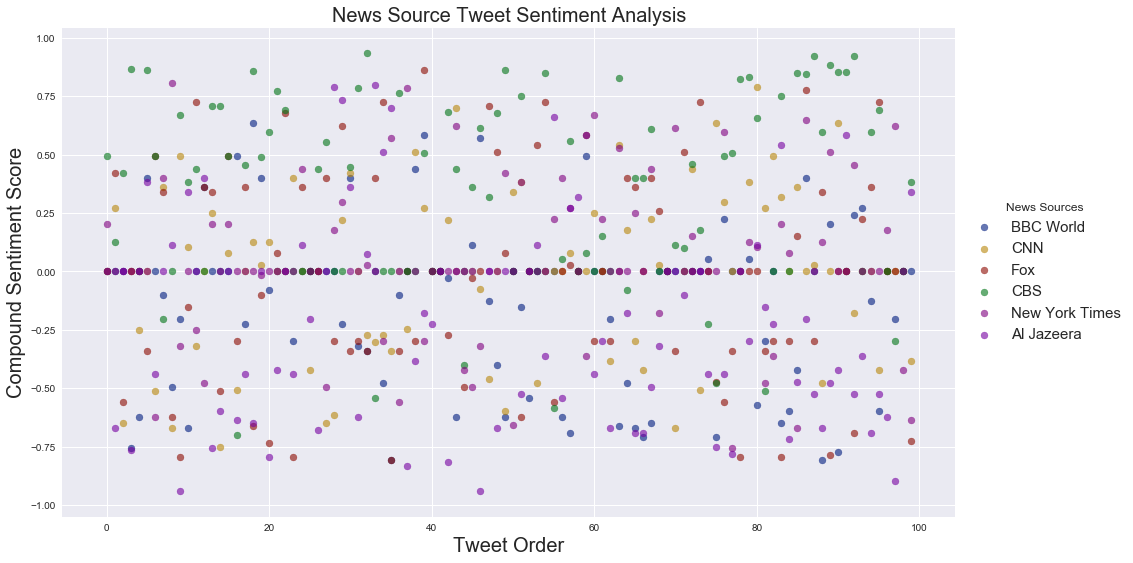

In [7]:
sns.set()
sns.set_color_codes("dark")

plt.rcParams["figure.figsize"] = [16,9]

plt.title("News Source Tweet Sentiment Analysis", size=20)
plt.ylabel("Compound Sentiment Score", size=20)
plt.xlabel("Tweet Order", size=20)

plt.scatter(bbc_x, 
            bbc_y, 
            c="b", 
            alpha=0.6, 
            label="BBC World"
           )

plt.scatter(cnn_x, 
            cnn_y, 
            c="y", 
            alpha=0.6, 
            label="CNN"
           )

plt.scatter(fox_x, 
            fox_y, 
            c="r", 
            alpha=0.6, 
            label="Fox"
           )

plt.scatter(cbs_x, 
            cbs_y, 
            c="g", 
            alpha=0.6, 
            label="CBS"
           )

plt.scatter(nyt_x, 
            nyt_y, 
            c="purple", 
            alpha=0.6, 
            label="New York Times"
           )

plt.scatter(ajz_x, 
            ajz_y, 
            c="m", 
            alpha=0.6, 
            label="Al Jazeera"
           )

plt.legend(title='News Sources', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plt.savefig('Tweet_Sentiments.png')
plt.show()


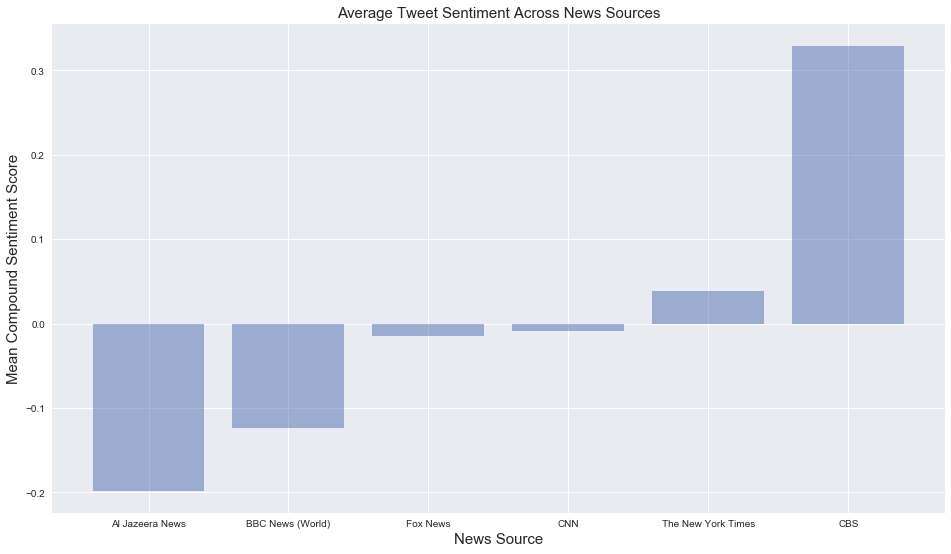

In [8]:

y_pos = np.arange(len(compound_list_bar))
 
plt.bar(y_pos, compound_list_bar, align='center', alpha=0.5)
plt.xticks(y_pos, source_list_bar)
plt.xlabel('News Source', size=15)
plt.ylabel('Mean Compound Sentiment Score', size=15)
plt.title('Average Tweet Sentiment Across News Sources', size=15)
plt.rcParams["figure.figsize"] = [16,9]
plt.savefig('Tweet_Compound_Bar.png')
plt.show()


Observations:

1. The mean sentiment scores for the news sources are generally very well distributed on a tweet by tweet basis. Most news sources have a large variety of positive and negative tweets.

2. When using the mean compound scores, the news sources seem to have

3. Most news sources do not have an overwhelmingly positive or negative skew. Overall, they are largely neutral.